In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from sklearn.compose import make_column_transformer 
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score,accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.impute import SimpleImputer

from sklearn.naive_bayes import BernoulliNB
from sklearn import datasets, linear_model, metrics

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
cancer = pd.read_csv('BreastCancer.csv',index_col=0)

In [3]:
cancer.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant
95719,6,10,10,10,8,10,7,10,7,Malignant
128059,1,1,1,1,2,5,5,1,1,Benign


In [4]:
X = cancer.drop('Class',axis=1)
y = cancer['Class']

In [5]:
scaler = StandardScaler().set_output(transform='pandas')
X_scl = scaler.fit_transform(X)
prcomp = PCA().set_output(transform='pandas')
X_pca= prcomp.fit_transform(X_scl)
prcomp.explained_variance_ratio_*100

array([65.45437483,  8.62625123,  5.98724547,  5.13612665,  4.21920122,
        3.39206535,  3.28441735,  2.91485025,  0.98546764])

In [6]:
X.columns

Index(['Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith', 'BareN',
       'BChromatin', 'NoemN', 'Mitoses'],
      dtype='object')

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Clump', ylabel='SEpith'>

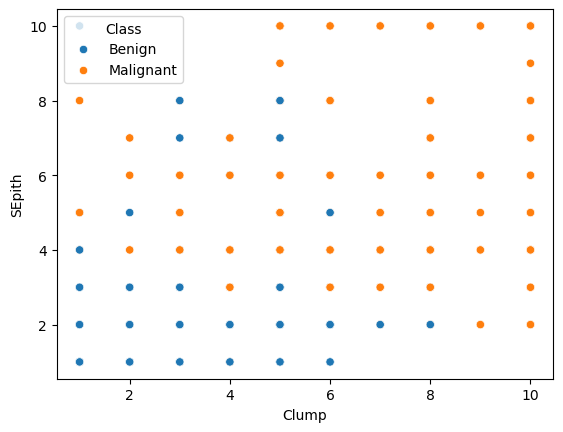

In [8]:
sns.scatterplot(x='Clump',y = 'SEpith',data=cancer,hue='Class')

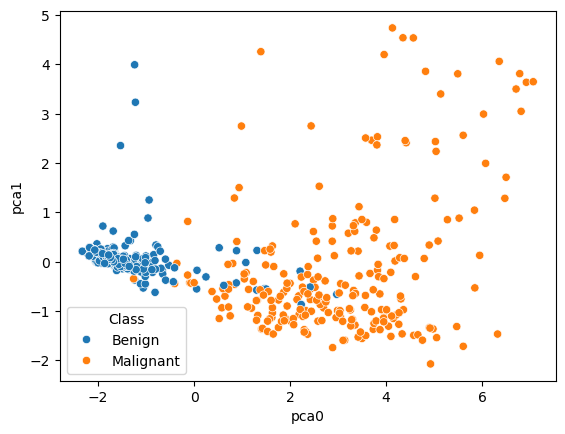

In [9]:
df_pca = X_pca.copy()
df_pca['Class'] = cancer['Class']
sns.scatterplot(x='pca0',y='pca1',data=df_pca, hue='Class')
plt.show()

#### Usage with **Supervised Learning** 

In [10]:
X = cancer.drop('Class',axis=1)
y = cancer['Class']

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=24,test_size=0.3,stratify=y)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
lr = LogisticRegression(random_state=24)
prcomp = PCA(n_components=5).set_output(transform='pandas')  # here if we specify n_components = 5 we dont need to specify iloc as in futher examples
pipe_pca = Pipeline([('SCL',scaler),('PCA',prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca,y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca)
print(accuracy_score(y_test,y_pred))

0.9761904761904762


In [13]:
lr = LogisticRegression(random_state=24)
pipe_pca = Pipeline([('SCL',scaler),('PCA',prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca.iloc[:,:5],y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca.iloc[:,:5])
print(accuracy_score(y_test,y_pred))

0.9761904761904762


In [14]:
lr = LogisticRegression(random_state=24)
pipe_pca = Pipeline([('SCL',scaler),('PCA',prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca.iloc[:,:4],y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca.iloc[:,:4])
print(accuracy_score(y_test,y_pred))

0.9714285714285714


In [15]:
lr = LogisticRegression(random_state=24)
pipe_pca = Pipeline([('SCL',scaler),('PCA',prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca.iloc[:,:3],y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca.iloc[:,:3])
print(accuracy_score(y_test,y_pred))

0.9619047619047619


In [16]:
lr = LogisticRegression(random_state=24)
pipe_pca = Pipeline([('SCL',scaler),('PCA',prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca.iloc[:,:2],y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca.iloc[:,:2])
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [17]:
lr = LogisticRegression(random_state=24)
pipe_pca = Pipeline([('SCL',scaler),('PCA',prcomp)])
X_trn_pca = pipe_pca.fit_transform(X_train)
lr.fit(X_trn_pca.iloc[:,:1],y_train)
X_tst_pca = pipe_pca.transform(X_test)
y_pred = lr.predict(X_tst_pca.iloc[:,:1])
print(accuracy_score(y_test,y_pred))

0.9714285714285714


In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

## Linear Discriminant Transfromation

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score

In [25]:
lda  = LinearDiscriminantAnalysis()
pipe_lda = Pipeline([('LDA',lda),('LR',lr)])

In [29]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=24,test_size=0.3)
pipe_lda.fit(X_train,y_train)
y_pred = pipe_lda.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9904761904761905


In [31]:
y_pred_prob = pipe_lda.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred_prob))

0.9996000399960003


### kfold